# Comparativa Algoritmos de Ordenación

## Implementación de Algoritmos de Ordenamiento

In [10]:
import numpy as np
import copy
import matplotlib.pyplot as plt

### BubbleSort

In [11]:
class BubbleSort:
    def __init__(self, array):
        self.array = copy.deepcopy(array)
        self.num_comparisons = 0
        self.num_swaps = 0
        self.n = len(array)

    def sorting(self):
        for i in range(self.n - 1):
            for j in range(0, self.n - i - 1):
                self.num_comparisons += 1
                if self.array[j + 1] < self.array[j]:
                    self.array[j + 1] , self.array[j] = self.array[j] , self.array[j + 1]
                    self.num_swaps += 1

### FlagBubbleSort

In [12]:
class FlagBubbleSort:
    def __init__(self, array):
        self.array = copy.deepcopy(array)
        self.num_comparisons = 0
        self.num_swaps = 0
        self.n = len(array)

    def sorting(self):
        for i in range(self.n - 1):
            swapped = False
            for j in range(0, self.n - i - 1):
                self.num_comparisons += 1
                if self.array[j + 1] < self.array[j]:
                    self.array[j + 1] , self.array[j] = self.array[j] , self.array[j + 1]
                    self.num_swaps += 1
                    swapped = True
            if not swapped:
                break

### QuickSort

In [13]:
def median_of_3(array, low, high):
    x1 = array[low]
    middle = (low + high + 1)//2
    x2 = array[middle]
    x3 = array[high]
    if (x2 <= x1 and x1<=x3) or (x3 <= x1 and x1<=x2):
        return low
    elif(x1 <= x2 and x2<=x3) or (x3 <= x2 and x2<=x1):
        return middle
    else:
        return high

In [14]:
class QuickSort:
    def __init__(self, array) -> None:
        self.array = copy.deepcopy(array)
        self._num_comparisons = 0
        self._num_swaps = 0
        self.n = len(array)
    def partition(self, low, high):
        """
        Create partition function for inplace array modification
        """
        i = low - 1
        pivot_index = median_of_3(self.array, low, high)
        self.array[pivot_index], self.array[high] = self.array[high], self.array[pivot_index]
        #print('partition index: ', self.array[pivot_index])
        pivot = self.array[high]
        for j in range(low, high):
            self.num_comparisons += 1
            if self.array[j] <= pivot:
                self.num_swaps += 1
                i = i + 1
                self.array[j], self.array[i] = self.array[i], self.array[j]
        self.array[i + 1], self.array[high] = self.array[high], self.array[i + 1]
        return i + 1

    def q_sort(self, low, high):
        """
        Perform recursive calls
        """
        if low < high:
            q = self.partition(low, high)
            #print('pivot: ', self.array[q], ', index: ', q)
            #print(self.array)
            self.q_sort(low, q - 1)
            self.q_sort(q + 1, high)
    def sorting(self):
        #print('1st call: ', self.array)
        self.num_comparisons = 0
        self.num_swaps = 0
        self.q_sort(0, self.n - 1)

## Comparativa de performance

In [15]:
comparisons_qs = []
swaps_qs = []
comparisons_bs = []
swaps_bs = []
comparisons_fbs = []
swaps_fbs = []
lenghts = []

In [16]:
for i in range(100, 2_001, 100):
    temp_arr = np.random.randint(0, 100_000, i)
    temp_qsort = QuickSort(temp_arr)
    temp_qsort.sorting()
    temp_bsort = BubbleSort(temp_arr)
    temp_bsort.sorting()
    temp_fbsort = FlagBubbleSort(temp_arr)
    temp_fbsort.sorting()
    lenghts.append(i)
    swaps_qs.append(temp_qsort.num_swaps)
    comparisons_qs.append(temp_qsort.num_comparisons)
    swaps_bs.append(temp_bsort.num_swaps)
    comparisons_bs.append(temp_bsort.num_comparisons)
    swaps_fbs.append(temp_fbsort.num_swaps)
    comparisons_fbs.append(temp_fbsort.num_comparisons)
    print(f'Array {i} done')

Array 100 done
Array 200 done
Array 300 done
Array 400 done
Array 500 done
Array 600 done
Array 700 done
Array 800 done
Array 900 done
Array 1000 done
Array 1100 done
Array 1200 done
Array 1300 done
Array 1400 done
Array 1500 done
Array 1600 done
Array 1700 done
Array 1800 done
Array 1900 done
Array 2000 done


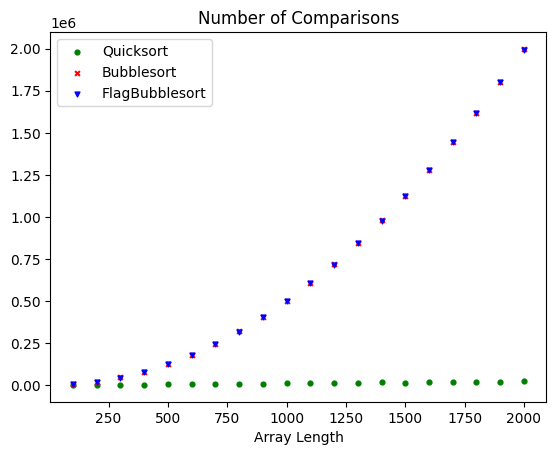

In [19]:
plt.scatter(x = lenghts, y = comparisons_qs, label='Quicksort', s = 12, c = 'g')
plt.scatter(x = lenghts, y = comparisons_bs, label='Bubblesort', s = 12, c = 'r', marker = 'x')
plt.scatter(x = lenghts, y = comparisons_fbs, label='FlagBubblesort', s = 12, c = 'b', marker = 'v')
plt.title('Number of Comparisons')
plt.xlabel('Array Length')
plt.legend()
plt.show()

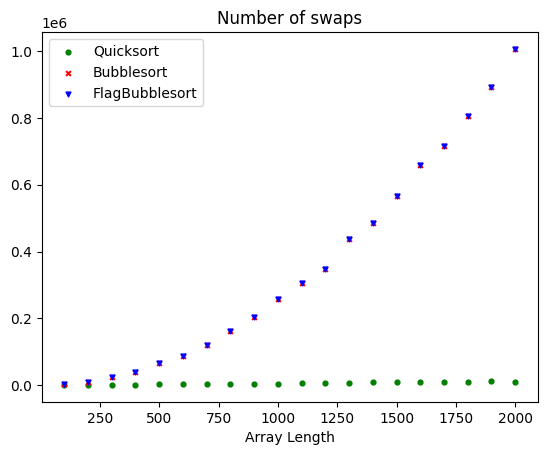

In [20]:
plt.scatter(x = lenghts, y = swaps_qs, label='Quicksort', s = 12, c = 'g')
plt.scatter(x = lenghts, y = swaps_bs, label='Bubblesort', s = 12, c = 'r', marker = 'x')
plt.scatter(x = lenghts, y = swaps_fbs, label='FlagBubblesort', s = 12, c = 'b', marker = 'v')
plt.xlabel('Array Length')
plt.title('Number of swaps')
plt.legend()
plt.show()

En Terminal
Ejecutar

pdflatex reporte_quicksort.tex

bibtex reporte_quicksort Este es el que falta

pdflatex reporte_quicksort.tex

pdflatex reporte_quicksort.tex